# Business Problem Statement
- Problem Statement for Machine Learning : How to predict Employee's Promotion so we can have precise target of potential and outstanding employee in order to reduce subjectivity approach and optimize the working environment ?

- Problem Statement for Analytics : What Employee's Profile should we maintain in order to find potential candidate?

- This Analytical Approach will be used by a Start Up Company (E-Commerce field), People Development Division to analyze and to predict the potential candidate.
- Project Limitation : Employee Profile (Under Manager)

- Feature Explanation :
    - department: Department of employee
    - region: Region of employment 
    - education: Education Level
    - gender: Gender of Employee
    - recruitment_channel: Channel of recruitment for employee
    - no_ of_ trainings: no of other trainings completed in previous year on soft skills, technical skills etc.
    - age: Age of Employee
    - previous_ year_ rating: Employee Rating for the previous year
    - length_ of_ service: Length of service in years
    - awards_ won?: if awards won during previous year then 1 else 0
    - avg_ training_ score: Average score in current training evaluations
    - is_promoted: (Target) Recommended for promotion

# Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.drop('employee_id',inplace=True,axis=1)

In [5]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


- Check Datatypes

In [6]:
df.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.0+ MB


- Convert Datatypes

In [8]:
df['awards_won?'] = df['awards_won?'].astype('object')

In [9]:
df.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?              object
avg_training_score        int64
is_promoted               int64
dtype: object

- Datasets Info

In [10]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) *100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [11]:
pd.DataFrame(dataDesc,columns=[
    "Data Features",
    "Data Type",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,department,object,0,0.00,9,"[Technology, Analytics]"
1,region,object,0,0.00,34,"[region_22, region_1]"
2,education,object,2409,4.40,3,"[Below Secondary, Master's & above]"
3,gender,object,0,0.00,2,"[f, m]"
4,recruitment_channel,object,0,0.00,3,"[other, referred]"
5,no_of_trainings,int64,0,0.00,10,"[2, 8]"
6,age,int64,0,0.00,41,"[27, 52]"
7,previous_year_rating,float64,4124,7.52,5,"[5.0, 4.0]"
8,length_of_service,int64,0,0.00,35,"[13, 2]"
9,awards_won?,object,0,0.00,2,"[1, 0]"


In [12]:
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,99.000000,1.000000


In [13]:
df.describe(include='O')

,department,region,education,gender,recruitment_channel,awards_won?
count,54808,54808,52399,54808,54808,54808
unique,9,34,3,2,3,2
top,Sales & Marketing,region_2,Bachelor's,m,other,0
freq,16840,12343,36669,38496,30446,53538


- Check Missing Value

In [14]:
df.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

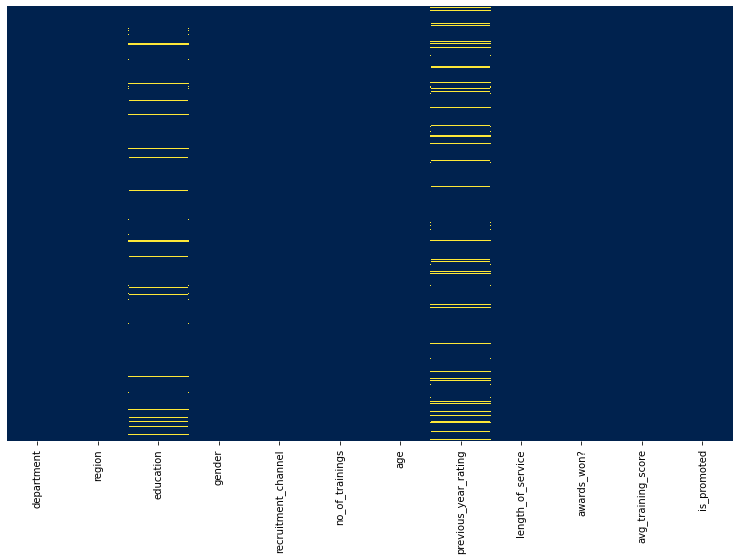

In [15]:
plt.figure(figsize=(13,8))
sns.heatmap(df.isna(),cmap='cividis',yticklabels=False,cbar=False)
plt.show()

- Check Imbalance

In [16]:
(pd.crosstab(index=df['is_promoted'],columns='Percentage',normalize=True)*100).round(2) # Datasets are Imbalance

col_0,Percentage
is_promoted,
0,91.48
1,8.52


- Missing Values Detected on Education and Previous Year Rating Feature, instead of Dropping the Rows, we try to fiiling the Missing values with Mode

In [31]:
dataDesc1 = []

for i in df.columns:
    dataDesc1.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) *100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [32]:
pd.DataFrame(dataDesc1,columns=[
    "Data Features",
    "Data Type",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,department,object,0,0.00,9,"[Procurement, Analytics]"
1,region,object,0,0.00,34,"[region_22, region_10]"
2,education,object,2409,4.40,3,"[Below Secondary, nan]"
3,gender,object,0,0.00,2,"[m, f]"
4,recruitment_channel,object,0,0.00,3,"[sourcing, other]"
5,no_of_trainings,int64,0,0.00,10,"[7, 4]"
6,age,int64,0,0.00,41,"[48, 51]"
7,previous_year_rating,float64,4124,7.52,5,"[2.0, 1.0]"
8,length_of_service,int64,0,0.00,35,"[28, 6]"
9,awards_won?,object,0,0.00,2,"[1, 0]"


- Finding the Correlation and Association Between Features

- Correlation Ratio (For Numerical Features)
- Association (For Categorical Features) Cramer's V and Theil's U

In [33]:
df_numerical = df[['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score','is_promoted']]

In [34]:
df_categorical = df[['department','region','education','gender','recruitment_channel','awards_won?','is_promoted']]

In [35]:
df_numerical.head()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
0,1,35,5.0,8,49,0
1,1,30,5.0,4,60,0
2,1,34,3.0,7,50,0
3,2,39,1.0,10,50,0
4,1,45,3.0,2,73,0


In [36]:
df_categorical.head()

,department,region,education,gender,recruitment_channel,awards_won?,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,0,0
1,Operations,region_22,Bachelor's,m,other,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,0,0
4,Technology,region_26,Bachelor's,m,other,0,0


# Preprocessing

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   department                54808 non-null  object  
 1   region                    54808 non-null  object  
 2   education                 52399 non-null  object  
 3   gender                    54808 non-null  object  
 4   recruitment_channel       54808 non-null  object  
 5   no_of_trainings           54808 non-null  int64   
 6   age                       54808 non-null  int64   
 7   previous_year_rating      50684 non-null  float64 
 8   length_of_service         54808 non-null  int64   
 9   awards_won?               54808 non-null  object  
 10  avg_training_score        54808 non-null  int64   
 11  is_promoted               54808 non-null  int64   
 12  age_recat                 54808 non-null  category
 13  no_of_trainings_recat     54808 non-null  obje

In [119]:
df.isna().sum()

department                     0
region                         0
education                   2409
gender                         0
recruitment_channel            0
no_of_trainings                0
age                            0
previous_year_rating        4124
length_of_service              0
awards_won?                    0
avg_training_score             0
is_promoted                    0
age_recat                      0
no_of_trainings_recat          0
length_of_service_recat        0
avg_training_score_recat       0
dtype: int64

In [120]:
df['education'].mode() #Fiiling Missing Value on Pipeline

0    Bachelor's
dtype: object

In [121]:
df[df['previous_year_rating'].isna()]['length_of_service'].value_counts() #Assume that All of the Missing Value on Previous Year Rating Features are the one who worked under 1 year of service

1    4124
Name: length_of_service, dtype: int64

In [122]:
df1 = df.dropna(subset=['previous_year_rating'],axis=0)

In [123]:
df1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,age_recat,no_of_trainings_recat,length_of_service_recat,avg_training_score_recat
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,C,1,2,C
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,B,1,1,C
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,C,1,2,C
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,D,Others,2,C
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,E,1,1,B


In [124]:
df1.isna().sum()

department                     0
region                         0
education                   2024
gender                         0
recruitment_channel            0
no_of_trainings                0
age                            0
previous_year_rating           0
length_of_service              0
awards_won?                    0
avg_training_score             0
is_promoted                    0
age_recat                      0
no_of_trainings_recat          0
length_of_service_recat        0
avg_training_score_recat       0
dtype: int64

In [125]:
def education_recat(x):
    if x == "Bachelor's":
        return 1
    elif x == "Master's & above" :
        return 2
    else :
        return 0

In [126]:
df1['education_recat'] = df1['education'].apply(education_recat)

In [127]:
df1['education_recat'].astype('int64')

0        2
1        1
2        1
3        1
4        1
        ..
54803    1
54804    2
54805    1
54806    0
54807    1
Name: education_recat, Length: 50684, dtype: int64

In [128]:
df1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,age_recat,no_of_trainings_recat,length_of_service_recat,avg_training_score_recat,education_recat
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,C,1,2,C,2
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,B,1,1,C,1
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,C,1,2,C,1
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,D,Others,2,C,1
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,E,1,1,B,1


df1.info()

In [129]:
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report

- Data Splitting

In [130]:
X = df1[['department','region','education_recat','gender','recruitment_channel','no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']]

In [131]:
y = df1['is_promoted']

In [132]:
X.shape

(50684, 11)

In [133]:
y.shape

(50684,)

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.80,stratify=y,random_state=42)

- Pipeline Base Model (KNN, Logistic Regression, SVC)

In [135]:
num_columns = ['education_recat','no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']

cat_columns = ['department','region','gender','recruitment_channel','awards_won?']

In [136]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
])

cat_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder())
])

In [137]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipeline,num_columns),
    ('categoric',cat_pipeline,cat_columns)
])

In [138]:
Pipe_KNN = Pipeline([
    ('prep',preprocessor),
    ('algo',KNeighborsClassifier())
])

Pipe_RF = Pipeline([
    ('prep',preprocessor),
    ('algo',RandomForestClassifier(class_weight={0:0.1, 1:0.9}))
])

Pipe_LR = Pipeline([
    ('prep',preprocessor),
    ('algo',LogisticRegression(class_weight={0:0.1, 1:0.9},solver='liblinear'))
])

In [139]:
Pipe_KNN.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['education_recat',
                                                   'no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'avg_training_score']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                            

In [140]:
Pipe_RF.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['education_recat',
                                                   'no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'avg_training_score']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                            

In [141]:
Pipe_LR.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['education_recat',
                                                   'no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'avg_training_score']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                            

- Evaluation Matrix on Test Data

In [142]:
def Eva_Matrix_Class(Model,X,y_true):
    y_pred = Model.predict(X)
    acc = accuracy_score(y_true,y_pred)
    rec = recall_score(y_true,y_pred)
    prec = precision_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    cm = confusion_matrix(y_true,y_pred,labels=[1,0])
    df_cm = pd.DataFrame(data=cm,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])
    cr = classification_report(y_true,y_pred)
    return acc, rec, prec, f1, df_cm, cr

In [143]:
acc_KNN, rec_KNN, prec_KNN, f1_KNN, cm_KNN , cr_KNN = Eva_Matrix_Class(Pipe_KNN,X_test,y_test)
acc_RF, rec_RF, prec_RF, f1_RF, cm_RF , cr_RF = Eva_Matrix_Class(Pipe_RF,X_test,y_test)
acc_LR, rec_LR, prec_LR, f1_LR, cm_LR , cr_LR = Eva_Matrix_Class(Pipe_LR,X_test,y_test)

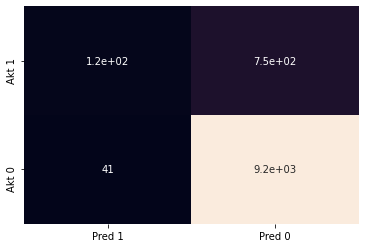

In [144]:
sns.heatmap(cm_KNN,cbar=False,annot=True);

In [145]:
print(cr_KNN)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9271
           1       0.74      0.14      0.23       866

    accuracy                           0.92     10137
   macro avg       0.83      0.57      0.60     10137
weighted avg       0.91      0.92      0.90     10137



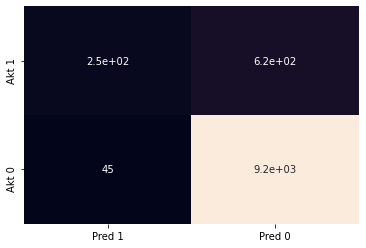

In [146]:
sns.heatmap(cm_RF,cbar=False,annot=True);

In [147]:
print(cr_RF)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9271
           1       0.85      0.29      0.43       866

    accuracy                           0.93     10137
   macro avg       0.89      0.64      0.70     10137
weighted avg       0.93      0.93      0.92     10137



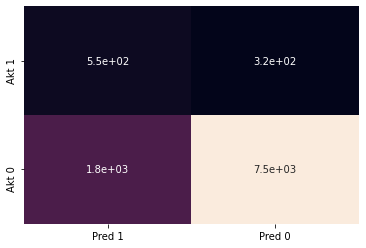

In [148]:
sns.heatmap(cm_LR,cbar=False,annot=True);

In [149]:
print(cr_LR)

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      9271
           1       0.24      0.63      0.35       866

    accuracy                           0.80     10137
   macro avg       0.60      0.72      0.61     10137
weighted avg       0.90      0.80      0.83     10137



- Hyperparameter Tuning

In [150]:
Pipe_KNN.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent'))]),
                                    ['education_recat', 'no_of_trainings', 'age',
                                     'previous_year_rating', 'length_of_service',
                                     'avg_training_score']),
                                   ('categoric',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder', OneHotEncoder())]),
                                    ['department', 'region', 'gender',
                                     'recruitment_channel', 'awards_won?'])])),
  ('algo', KNeighborsClassifier())],
 'verbose': False,
 'prep': ColumnTransformer(transfo

In [151]:
Pipe_RF.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent'))]),
                                    ['education_recat', 'no_of_trainings', 'age',
                                     'previous_year_rating', 'length_of_service',
                                     'avg_training_score']),
                                   ('categoric',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder', OneHotEncoder())]),
                                    ['department', 'region', 'gender',
                                     'recruitment_channel', 'awards_won?'])])),
  ('algo', RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}))],
 'verbose': False,
 'p

In [152]:
Pipe_LR.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent'))]),
                                    ['education_recat', 'no_of_trainings', 'age',
                                     'previous_year_rating', 'length_of_service',
                                     'avg_training_score']),
                                   ('categoric',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder', OneHotEncoder())]),
                                    ['department', 'region', 'gender',
                                     'recruitment_channel', 'awards_won?'])])),
  ('algo',
   LogisticRegression(class_weight={0: 0.1, 1: 0.9}, solver='liblinear'))],
 'v

In [153]:
# Iteration 1 : n-neighbors = 1-9 >> result best param = 9
# Iteration 2 : n-neighbors = 9-19 >> result best param = 9

In [154]:
param_KNN = {
    'algo__n_neighbors' : np.arange(9,20,2),
    'algo__weights' : ['uniform','distance']
}

In [155]:
param_RF = {
    'algo__max_depth' : np.arange(10,100),
    'algo__min_samples_leaf' : np.arange(1,5),
    'algo__class_weight' : [{0:i,1:(1-i)} for i in [0.1,0.2,0.3,0.4]],
}

In [156]:
param_LR = {
    'algo__C' : np.arange(1,11,2),
    'algo__class_weight' : [{0:i,1:(1-i)} for i in [0.1,0.2,0.3,0.4]],
    'algo__l1_ratio' : np.arange(0,1.1,0.2)
}

In [157]:
skf = StratifiedKFold(n_splits=3,random_state=42,shuffle=True)

In [158]:
GS_KNN = GridSearchCV(Pipe_KNN,param_KNN, cv=skf, scoring='f1',verbose=1)

In [159]:
GS_KNN.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  9.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['education_recat',
                                                                          'no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'avg_training_score']),

In [160]:
GS_KNN.best_params_

{'algo__n_neighbors': 9, 'algo__weights': 'distance'}

In [161]:
KNN_Tuned = GS_KNN.best_estimator_

In [162]:
acc_KNN_Tuned, rec_KNN_Tuned, prec_KNN_Tuned, f1_KNN_Tuned, cm_KNN_Tuned , cr_KNN_Tuned = Eva_Matrix_Class(KNN_Tuned,X_test,y_test)

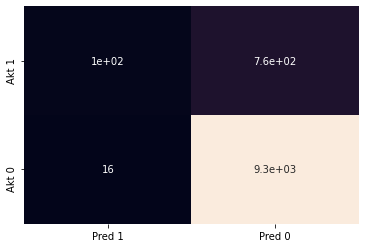

In [163]:
sns.heatmap(cm_KNN_Tuned,cbar=False,annot=True);

In [164]:
print(cr_KNN_Tuned)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9271
           1       0.87      0.12      0.21       866

    accuracy                           0.92     10137
   macro avg       0.90      0.56      0.59     10137
weighted avg       0.92      0.92      0.90     10137



In [165]:
RS_RF = RandomizedSearchCV(Pipe_RF,param_RF, cv=skf, scoring='f1',verbose=1,n_iter=100)

In [166]:
RS_RF.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 51.2min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent'))]),
                                                                               ['education_recat',
                                                                                'no_of_trainings',
                                                                                'age',
                                                                                'previous_year_rating',
                                                                                'length_of_service',
                                     

In [167]:
RS_RF.best_params_

{'algo__min_samples_leaf': 2,
 'algo__max_depth': 34,
 'algo__class_weight': {0: 0.1, 1: 0.9}}

In [195]:
RF_Tuned = RS_RF.best_estimator_

In [196]:
acc_RF_Tuned, rec_RF_Tuned, prec_RF_Tuned, f1_RF_Tuned, cm_RF_Tuned , cr_RF_Tuned = Eva_Matrix_Class(RF_Tuned,X_test,y_test)

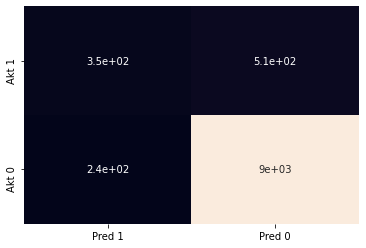

In [197]:
sns.heatmap(cm_RF_Tuned,cbar=False,annot=True);

In [171]:
print(cr_RF_Tuned)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9271
           1       0.59      0.41      0.48       866

    accuracy                           0.93     10137
   macro avg       0.77      0.69      0.72     10137
weighted avg       0.92      0.93      0.92     10137



In [172]:
GS_LR = GridSearchCV(Pipe_LR,param_LR, cv=skf, scoring='f1',verbose=1)

In [173]:
GS_LR.fit(X_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  6.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['education_recat',
                                                                          'no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'avg_training_score']),

In [174]:
GS_LR.best_params_

{'algo__C': 9, 'algo__class_weight': {0: 0.3, 1: 0.7}, 'algo__l1_ratio': 0.0}

In [175]:
LR_Tuned = GS_LR.best_estimator_

In [176]:
acc_LR_Tuned, rec_LR_Tuned, prec_LR_Tuned, f1_LR_Tuned, cm_LR_Tuned , cr_LR_Tuned = Eva_Matrix_Class(LR_Tuned,X_test,y_test)

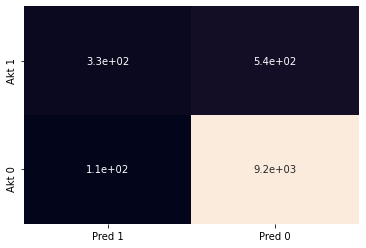

In [177]:
sns.heatmap(cm_LR_Tuned,cbar=False,annot=True);

In [178]:
print(cr_LR_Tuned)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      9271
           1       0.75      0.38      0.50       866

    accuracy                           0.94     10137
   macro avg       0.85      0.68      0.74     10137
weighted avg       0.93      0.94      0.93     10137



- Feature Engineering (Feature Selection)
    - From Correlation Ratio and Association on Features, we select the no_of_trainings, previous_year_rating, and awards_won for modelling

In [198]:
X_select = df1[['avg_training_score','previous_year_rating','awards_won?']]

In [199]:
y_select = df1['is_promoted']

In [200]:
X_train_select,X_test_select,y_train_select,y_test_select = train_test_split(X_select,y_select,train_size=.80,stratify=y_select,random_state=42)

In [205]:
num_columns1 = ['avg_training_score','previous_year_rating']

cat_columns1 = ['awards_won?']

num_pipeline1 = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
])

cat_pipeline1 = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder())
])

preprocessor1 = ColumnTransformer([
    ('numeric',num_pipeline1,num_columns1),
    ('categoric',cat_pipeline1,cat_columns1)
])

Pipe_KNN_select = Pipeline([
    ('prep',preprocessor1),
    ('algo',KNeighborsClassifier())
])

Pipe_RF_select = Pipeline([
    ('prep',preprocessor1),
    ('algo',RandomForestClassifier(class_weight={0:0.1, 1:0.9}))
])

Pipe_LR_select = Pipeline([
    ('prep',preprocessor1),
    ('algo',LogisticRegression(class_weight={0:0.1, 1:0.9},solver='liblinear'))
])

In [206]:
Pipe_KNN_select.fit(X_train_select,y_train_select)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['avg_training_score',
                                                   'previous_year_rating']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['awards_won?'])])),
                ('algo', KNeighborsClassifier())])

In [207]:
Pipe_RF_select.fit(X_train_select,y_train_select)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['avg_training_score',
                                                   'previous_year_rating']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['awards_won?'])])),
                ('algo',
                 RandomForestClassifier(class_weight={0: 0.1, 1:

In [208]:
Pipe_LR_select.fit(X_train_select,y_train_select)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['avg_training_score',
                                                   'previous_year_rating']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['awards_won?'])])),
                ('algo',
                 LogisticRegression(class_weight={0: 0.1, 1: 0.9

In [209]:
acc_KNN_select, rec_KNN_select, prec_KNN_select, f1_KNN_select, cm_KNN_select , cr_KNN_select = Eva_Matrix_Class(Pipe_KNN_select,X_test_select,y_test_select)
acc_RF_select, rec_RF_select, prec_RF_select, f1_RF_select, cm_RF_select , cr_RF_select = Eva_Matrix_Class(Pipe_RF_select,X_test_select,y_test_select)
acc_LR_select, rec_LR_select, prec_LR_select, f1_LR_select, cm_LR_select , cr_LR_select = Eva_Matrix_Class(Pipe_LR_select,X_test_select,y_test_select)

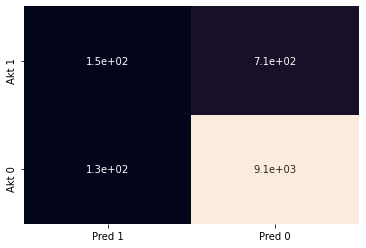

In [210]:
sns.heatmap(cm_KNN_select,cbar=False,annot=True);

In [211]:
print(cr_KNN_select)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9271
           1       0.54      0.18      0.27       866

    accuracy                           0.92     10137
   macro avg       0.73      0.58      0.61     10137
weighted avg       0.89      0.92      0.90     10137



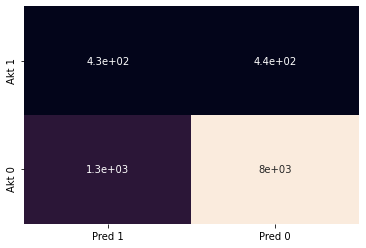

In [212]:
sns.heatmap(cm_RF_select,cbar=False,annot=True);

In [213]:
print(cr_RF_select)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      9271
           1       0.25      0.49      0.33       866

    accuracy                           0.83     10137
   macro avg       0.60      0.68      0.62     10137
weighted avg       0.89      0.83      0.85     10137



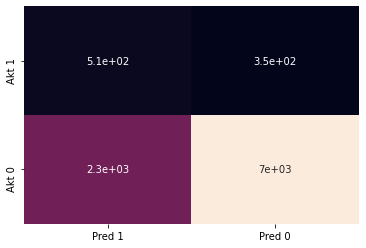

In [214]:
sns.heatmap(cm_LR_select,cbar=False,annot=True);

In [215]:
print(cr_LR_select)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      9271
           1       0.18      0.59      0.28       866

    accuracy                           0.74     10137
   macro avg       0.57      0.67      0.56     10137
weighted avg       0.89      0.74      0.79     10137



- Improvement Hyperparameter Tuning (Feature Selection)

In [216]:
param_KNN_select = {
    'algo__n_neighbors' : np.arange(1,10,2),
    'algo__p' : [1,2],
    'algo__weights' : ['uniform','distance']
}

In [217]:
param_RF_select = {
    'algo__max_depth' : np.arange(10,100),
    'algo__min_samples_leaf' : np.arange(1,5),
    'algo__class_weight' : [{0:i,1:(1-i)} for i in [0.1,0.2,0.3,0.4]],
}

In [218]:
param_LR_select = {
    'algo__C' : np.arange(1,11,2),
    'algo__class_weight' : [{0:i,1:(1-i)} for i in [0.1,0.2,0.3,0.4]],
    'algo__l1_ratio' : np.arange(0,1.1,0.2)
}

In [219]:
GS_KNN_select = GridSearchCV(Pipe_KNN_select,param_KNN_select, cv=skf, scoring='f1',verbose=1)

In [220]:
GS_KNN_select.fit(X_train_select,y_train_select)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   18.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['avg_training_score',
                                                                          'previous_year_rating']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                          

In [221]:
GS_KNN_select.best_params_

{'algo__n_neighbors': 5, 'algo__p': 1, 'algo__weights': 'uniform'}

In [222]:
KNN_Tuned_select = GS_KNN_select.best_estimator_

In [223]:
acc_KNN_Tuned_select, rec_KNN_Tuned_select, prec_KNN_Tuned_select, f1_KNN_Tuned_select, cm_KNN_Tuned_select , cr_KNN_Tuned_select = Eva_Matrix_Class(KNN_Tuned_select,X_test_select,y_test_select)

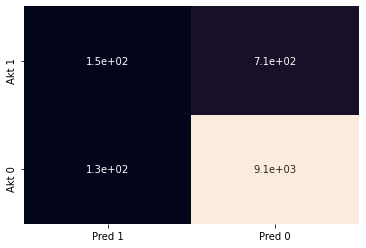

In [224]:
sns.heatmap(cm_KNN_Tuned_select,cbar=False,annot=True);

In [225]:
print(cr_KNN_Tuned_select)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9271
           1       0.54      0.18      0.26       866

    accuracy                           0.92     10137
   macro avg       0.73      0.58      0.61     10137
weighted avg       0.89      0.92      0.90     10137



In [227]:
RS_RF_select = RandomizedSearchCV(Pipe_RF_select,param_RF_select, cv=skf, scoring='f1',verbose=1,n_iter=100)

In [229]:
RS_RF_select.fit(X_train_select,y_train_select)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  4.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent'))]),
                                                                               ['avg_training_score',
                                                                                'previous_year_rating']),
                                                                              ('categoric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='

In [230]:
RS_RF_select.best_params_

{'algo__min_samples_leaf': 4,
 'algo__max_depth': 39,
 'algo__class_weight': {0: 0.2, 1: 0.8}}

In [231]:
RF_Tuned_select = RS_RF_select.best_estimator_

In [232]:
acc_RF_Tuned_select, rec_RF_Tuned_select, prec_RF_Tuned_select, f1_RF_Tuned_select, cm_RF_Tuned_select , cr_RF_Tuned_select = Eva_Matrix_Class(RF_Tuned_select,X_test_select,y_test_select)

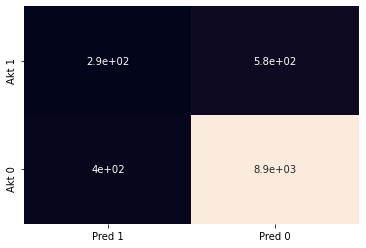

In [233]:
sns.heatmap(cm_RF_Tuned_select,cbar=False,annot=True);

In [234]:
print(cr_RF_Tuned_select)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9271
           1       0.42      0.33      0.37       866

    accuracy                           0.90     10137
   macro avg       0.68      0.64      0.66     10137
weighted avg       0.89      0.90      0.90     10137



In [235]:
GS_LR_select = GridSearchCV(Pipe_LR_select,param_LR_select, cv=skf, scoring='f1',verbose=1)

In [236]:
GS_LR_select.fit(X_train_select,y_train_select)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   27.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['avg_training_score',
                                                                          'previous_year_rating']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                          

In [237]:
GS_LR_select.best_params_

{'algo__C': 5, 'algo__class_weight': {0: 0.2, 1: 0.8}, 'algo__l1_ratio': 0.0}

In [238]:
LR_Tuned_select = GS_LR_select.best_estimator_

In [239]:
acc_LR_Tuned_select, rec_LR_Tuned_select, prec_LR_Tuned_select, f1_LR_Tuned_select, cm_LR_Tuned_select , cr_LR_Tuned_select = Eva_Matrix_Class(LR_Tuned_select,X_test_select,y_test_select)

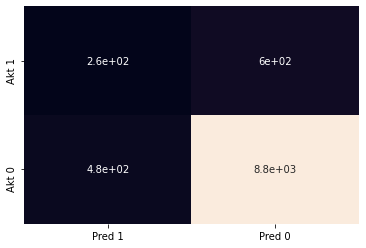

In [240]:
sns.heatmap(cm_LR_Tuned_select,cbar=False,annot=True);

In [241]:
print(cr_LR_Tuned_select)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      9271
           1       0.35      0.31      0.33       866

    accuracy                           0.89     10137
   macro avg       0.65      0.63      0.64     10137
weighted avg       0.89      0.89      0.89     10137



In [242]:
data_Eva_Matrix = {
    'KNN' :[acc_KNN, rec_KNN, prec_KNN, f1_KNN],
    'KNN_Tuned' :[acc_KNN_Tuned, rec_KNN_Tuned, prec_KNN_Tuned, f1_KNN_Tuned],
    'KNN_select' :[acc_KNN_select, rec_KNN_select, prec_KNN_select, f1_KNN_select],
    'KNN_Tuned_select' :[acc_KNN_Tuned_select, rec_KNN_Tuned_select, prec_KNN_Tuned_select, f1_KNN_Tuned_select],
    'RF' :[acc_RF, rec_RF, prec_RF, f1_RF],
    'RF_Tuned' :[acc_RF_Tuned, rec_RF_Tuned, prec_RF_Tuned, f1_RF_Tuned],
    'RF_select' :[acc_RF_select, rec_RF_select, prec_RF_select, f1_RF_select],
    'RF_Tuned_select' :[acc_RF_Tuned_select, rec_RF_Tuned_select, prec_RF_Tuned_select, f1_RF_Tuned_select],
    'LR' :[acc_LR, rec_LR, prec_LR, f1_LR],
    'LR_Tuned' :[acc_LR_Tuned, rec_LR_Tuned, prec_LR_Tuned, f1_LR_Tuned],
    'LR_select' :[acc_LR_select, rec_LR_select, prec_LR_select, f1_LR_select],
    'LR_Tuned_select' :[acc_LR_Tuned_select, rec_LR_Tuned_select, prec_LR_Tuned_select, f1_LR_Tuned_select],
    
}


In [243]:
pd.DataFrame(data_Eva_Matrix,index=['Accuracy','Recall','Precision','F1'])

,KNN,KNN_Tuned,KNN_select,KNN_Tuned_select,RF,RF_Tuned,RF_select,RF_Tuned_select,LR,LR_Tuned,LR_select,LR_Tuned_select
Accuracy,0.922265,0.923251,0.916839,0.916741,0.934695,0.925422,0.828352,0.903029,0.795798,0.936174,0.741048,0.893065
Recall,0.137413,0.120092,0.176674,0.175520,0.287529,0.407621,0.491917,0.330254,0.630485,0.381062,0.592379,0.306005
Precision,0.743750,0.866667,0.540636,0.539007,0.846939,0.592282,0.246813,0.415094,0.237805,0.748299,0.184201,0.354278
F1,0.231969,0.210953,0.266319,0.264808,0.429310,0.482900,0.328704,0.367846,0.345351,0.504973,0.281019,0.328377


- Using Best Model to Predict Probability (Logistic Regression Tuned)

In [244]:
X_test

,department,region,education_recat,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
44118,Analytics,region_15,1,m,other,1,26,3.0,3,0,82
21322,Analytics,region_22,1,f,sourcing,1,27,4.0,4,0,84
30620,Sales & Marketing,region_30,1,f,other,1,31,3.0,3,0,53
48124,Sales & Marketing,region_26,1,m,sourcing,1,24,1.0,2,0,48
5728,Technology,region_23,1,m,sourcing,2,32,3.0,5,0,84
...,...,...,...,...,...,...,...,...,...,...,...
52496,Analytics,region_22,0,m,sourcing,2,28,4.0,4,0,89
37852,Sales & Marketing,region_7,1,m,other,1,27,4.0,2,0,51
9248,Technology,region_2,2,f,sourcing,2,42,5.0,13,0,82
27306,Operations,region_22,2,f,sourcing,1,50,4.0,18,0,58


In [245]:
proba = LR_Tuned.predict_proba(X_test)

In [246]:
pred = LR_Tuned.predict(X_test)

In [247]:
df_proba = X_test

In [248]:
df_proba['is_promoted'] = y_test

In [249]:
df_proba['prediction'] = pred

In [250]:
df_proba[['Probability 0','Probability 1']] = proba

In [252]:
df_proba

,department,region,education_recat,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,prediction,Probability 0,Probability 1
44118,Analytics,region_15,1,m,other,1,26,3.0,3,0,82,0,0,0.923196,0.076804
21322,Analytics,region_22,1,f,sourcing,1,27,4.0,4,0,84,0,0,0.759023,0.240977
30620,Sales & Marketing,region_30,1,f,other,1,31,3.0,3,0,53,0,0,0.860398,0.139602
48124,Sales & Marketing,region_26,1,m,sourcing,1,24,1.0,2,0,48,0,0,0.979799,0.020201
5728,Technology,region_23,1,m,sourcing,2,32,3.0,5,0,84,0,0,0.697957,0.302043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52496,Analytics,region_22,0,m,sourcing,2,28,4.0,4,0,89,0,0,0.627112,0.372888
37852,Sales & Marketing,region_7,1,m,other,1,27,4.0,2,0,51,0,0,0.782547,0.217453
9248,Technology,region_2,2,f,sourcing,2,42,5.0,13,0,82,0,0,0.606335,0.393665
27306,Operations,region_22,2,f,sourcing,1,50,4.0,18,0,58,0,0,0.882076,0.117924


In [253]:
df_proba[df_proba['prediction']==1]

,department,region,education_recat,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,prediction,Probability 0,Probability 1
49529,Sales & Marketing,region_3,2,m,other,1,33,5.0,2,0,92,1,1,0.000273,0.999727
28171,Operations,region_7,1,f,sourcing,1,43,3.0,13,0,71,1,1,0.449788,0.550212
17319,Technology,region_2,1,f,referred,2,37,5.0,4,1,83,1,1,0.184602,0.815398
37792,Finance,region_26,1,m,sourcing,1,31,5.0,5,1,67,1,1,0.165942,0.834058
14637,Sales & Marketing,region_4,2,m,other,1,43,4.0,4,1,54,0,1,0.210088,0.789912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,HR,region_13,1,f,other,1,31,5.0,2,1,54,0,1,0.344846,0.655154
23749,Technology,region_22,2,m,other,2,43,4.0,11,0,89,1,1,0.302725,0.697275
10947,Technology,region_2,1,m,other,1,27,5.0,3,0,83,1,1,0.486963,0.513037
27529,Operations,region_2,2,m,other,1,39,3.0,5,0,78,1,1,0.142826,0.857174
